In [1]:
# Lasso回帰はL1正則化回帰とも呼ばれる
# Ridge回帰はL2正則化回帰とも呼ばれる

# Lasso回帰では、尖っている部分（微分不可能な点で、特定の回帰係数の大きさが0となっている）が解になりやすくなるため、いくつかの係数が0となる解が推定されやすい。
# Ridge回帰では、制約条件が円状であるため、回帰係数が全体的に小さくなる領域が解になりやすい

# Lasso回帰は不要なパラメータを削りたい（次元・特徴量削減）という時によく使われる
# Ridge回帰は過学習を抑えて汎化された滑らかなモデルを得やすい事がしらてている

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
%precision 3
%matplotlib inline

In [2]:
X = pd.read_csv('large-data.csv')
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


In [3]:
sp.mean(X.X_1)

0.037272

In [4]:
sp.mean(X, axis=0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [5]:
X -= sp.mean(X, axis=0)
X /= sp.std(X, ddof=1, axis=0)

In [6]:
sp.mean(X, axis=0).head(3).round(3)

X_1    0.0
X_2   -0.0
X_3   -0.0
dtype: float64

In [7]:
sp.std(X, ddof=1, axis=0).head(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

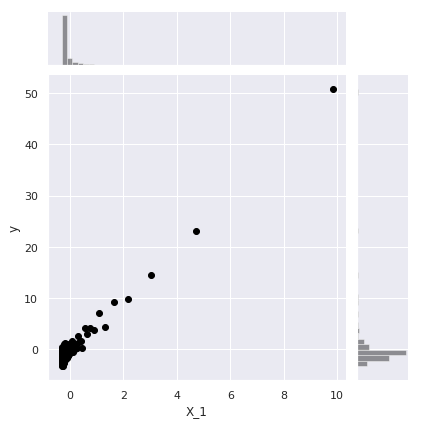

In [8]:
np.random.seed(1)
noise = sp.stats.norm.rvs(
    loc=0,
    scale=1,
    size=X.shape[0]
)
y = X.X_1 * 5 + noise
large_data = pd.concat(
    [pd.DataFrame({'y': y}), X],
    axis=1
)
sns.jointplot(
    y='y',
    x='X_1',
    data=large_data,
    color='black'
)

In [9]:
lm_statsmodels = sm.OLS(endog=y, exog=X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

In [10]:
lm_sklearn = linear_model.LinearRegression()
lm_sklearn.fit(X, y)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

In [11]:
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)
sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [12]:
ridge_coefs = []
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

Text(0, 0.5, 'Coefficients')

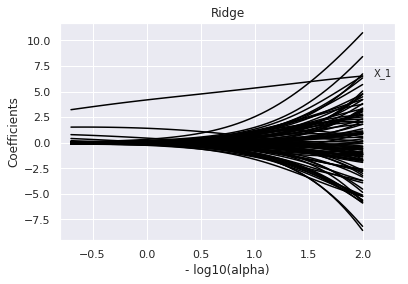

In [13]:
log_alphas = -sp.log10(ridge_alphas)
plt.plot(log_alphas, ridge_coefs, color='black')
plt.text(
    max(log_alphas) + 0.1,
    np.array(ridge_coefs)[0, 0],
    'X_1'
)
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.title('Ridge')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

In [14]:
ridge_best = linear_model.RidgeCV(
    cv=10,
    alphas=ridge_alphas,
    fit_intercept=False
)
ridge_best.fit(X, y)
-sp.log10(ridge_best.alpha_)

0.23673469387755094

In [15]:
ridge_best.alpha_

0.5797827717179138

In [16]:
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

In [17]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X,
    y,
    fit_intercept=False
)

Text(0, 0.5, 'Coefficients')

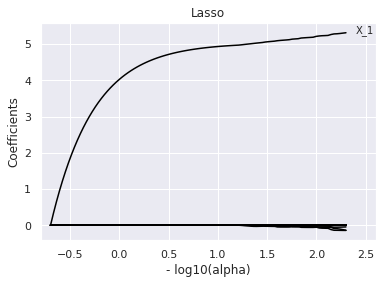

In [18]:
log_alphas = -sp.log10(lasso_alphas)
plt.plot(log_alphas, lasso_coefs.T, color='black')
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], 'X_1')
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
plt.title('Lasso')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

In [19]:
lasso_best = linear_model.LassoCV(
    cv=10,
    alphas=lasso_alphas,
    fit_intercept=False
)
lasso_best.fit(X, y)
-sp.log10(lasso_best.alpha_)

2.301043177767326

In [20]:
lasso_best.alpha_

0.004999848237729944

In [21]:
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e